In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Read dataset

In [3]:
df = pd.read_csv("bears.csv",sep=";",header=0)
df.head()

,AGE,MONTH,SEX,HEADLEN,HEADWTH,NECK,LENGTH,CHEST,WEIGHT
0,19,7,1,11.0,5.5,16.0,53.0,26.0,80
1,55,7,1,16.5,9.0,28.0,67.5,45.0,344
2,81,9,1,15.5,8.0,31.0,72.0,54.0,416
3,115,7,1,17.0,10.0,31.5,72.0,49.0,348
4,104,8,2,15.5,6.5,22.0,62.0,35.0,166


In [4]:
df.shape

(54, 9)

In [5]:
df.describe()

,AGE,MONTH,SEX,HEADLEN,HEADWTH,NECK,LENGTH,CHEST,WEIGHT
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,43.518519,8.407407,1.351852,12.953704,6.194444,20.555556,58.616667,35.662963,182.888889
std,33.720684,2.004886,0.482032,2.144032,1.512266,5.640710,10.700868,9.351729,121.801209
min,8.000000,4.000000,1.000000,9.000000,4.000000,10.000000,36.000000,19.000000,26.000000
25%,17.000000,8.000000,1.000000,11.500000,5.000000,16.625000,50.500000,29.000000,87.000000
50%,34.000000,9.000000,1.000000,13.000000,6.000000,20.000000,60.750000,34.000000,150.000000
75%,57.750000,10.000000,2.000000,14.500000,7.000000,24.000000,66.125000,43.500000,232.000000
max,177.000000,11.000000,2.000000,17.000000,10.000000,31.500000,76.500000,55.000000,514.000000


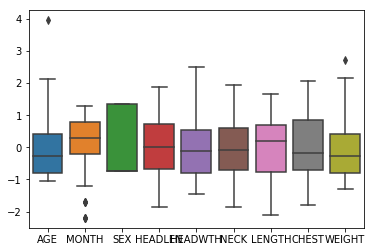

In [6]:
Z_scored_df = (df-df.mean())/df.std()
sns.boxplot(data = Z_scored_df)

In [7]:
df.std()

AGE         33.720684
MONTH        2.004886
SEX          0.482032
HEADLEN      2.144032
HEADWTH      1.512266
NECK         5.640710
LENGTH      10.700868
CHEST        9.351729
WEIGHT     121.801209
dtype: float64

# Detect outliers dimension per dimension

In [8]:
threshold = 2.5
mask = np.abs(df) > df.mean()+threshold*df.std()
outliers = df[mask.any(axis=1)]

In [9]:
df.mean()+threshold*df.std() #Valeurs à ne pas dépasser

AGE        127.820230
MONTH       13.419622
SEX          2.556932
HEADLEN     18.313783
HEADWTH      9.975110
NECK        34.657331
LENGTH      85.368838
CHEST       59.042285
WEIGHT     487.391912
dtype: float64

In [10]:
mask.head()

,AGE,MONTH,SEX,HEADLEN,HEADWTH,NECK,LENGTH,CHEST,WEIGHT
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [11]:
mask.any()

AGE         True
MONTH      False
SEX        False
HEADLEN    False
HEADWTH     True
NECK       False
LENGTH     False
CHEST      False
WEIGHT      True
dtype: bool

In [12]:
outliers

,AGE,MONTH,SEX,HEADLEN,HEADWTH,NECK,LENGTH,CHEST,WEIGHT
3,115,7,1,17.0,10.0,31.5,72.0,49.0,348
19,177,9,1,16.0,9.5,30.0,72.0,48.0,436
52,83,11,1,15.5,8.0,30.5,75.0,54.0,514


In [13]:
df = df.loc[sorted(list(set(df.index).difference(set(outliers.index))))]
df.head()

,AGE,MONTH,SEX,HEADLEN,HEADWTH,NECK,LENGTH,CHEST,WEIGHT
0,19,7,1,11.0,5.5,16.0,53.0,26.0,80
1,55,7,1,16.5,9.0,28.0,67.5,45.0,344
2,81,9,1,15.5,8.0,31.0,72.0,54.0,416
4,104,8,2,15.5,6.5,22.0,62.0,35.0,166
5,100,4,2,13.0,7.0,21.0,70.0,41.0,220


# Correlations between attributs
Reduce the dimensionality of the dataset

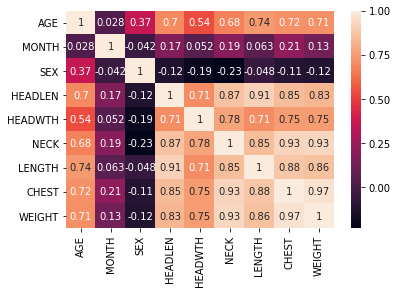

In [14]:
sns.heatmap(df.corr(),annot=True)

In [15]:
df_simple = df.copy()
del df_simple["CHEST"]
del df_simple["LENGTH"]
del df_simple["NECK"]
del df_simple["MONTH"]

# Normalize dataset

In [16]:
Z_df_simple = (df_simple - df_simple.mean())/df_simple.std()

# Hierarchical clustering
The clusters are clearly characterized by the age of the bears and their sex

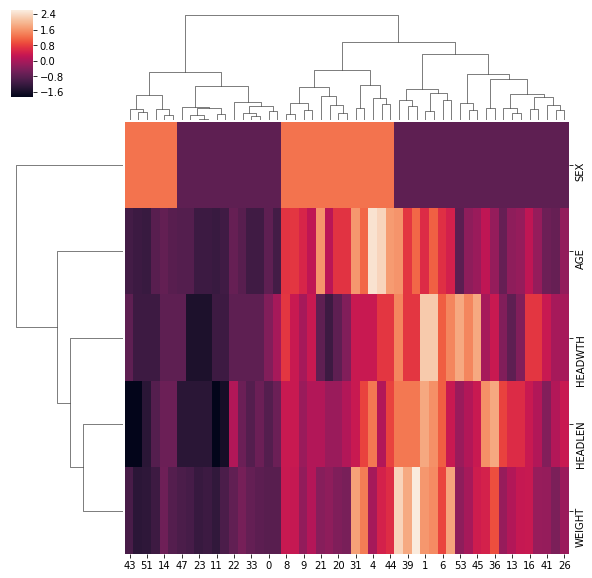

In [17]:
sns.clustermap(Z_df_simple.T,method='complete')

# Kmeans

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(3)
kmeans = kmeans.fit(Z_df_simple)
Z_df_simple["cluster"] = kmeans.predict(Z_df_simple)#Permet d'associer chaque point à un cluster


/home/pakito/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/pakito/anaconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/pakito/anaconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/pakito/anaconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/R

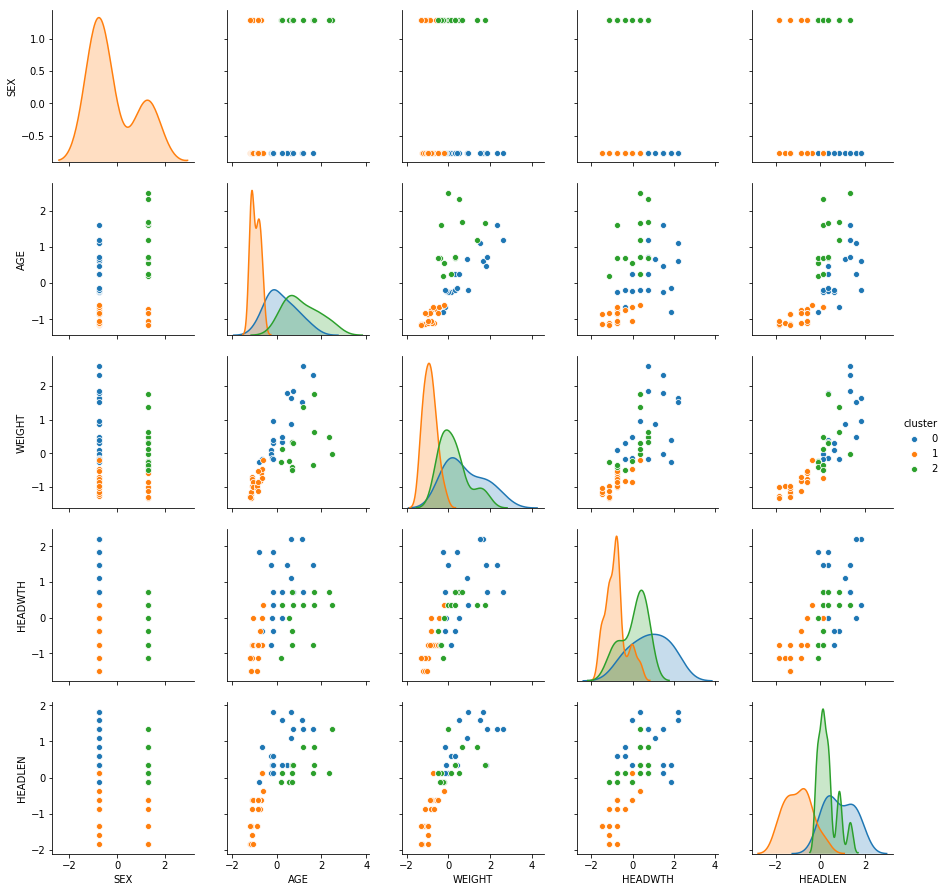

In [19]:
sns.pairplot(Z_df_simple,vars=["SEX","AGE","WEIGHT","HEADWTH","HEADLEN"],hue="cluster")

# Use a decision tree to describe the clusters

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix
import graphviz

In [21]:
dt = DecisionTreeClassifier(max_depth=2,criterion="entropy")
prediction_features = [c for c in Z_df_simple.columns if c != "cluster"]
dt = dt.fit(Z_df_simple[prediction_features],Z_df_simple["cluster"])

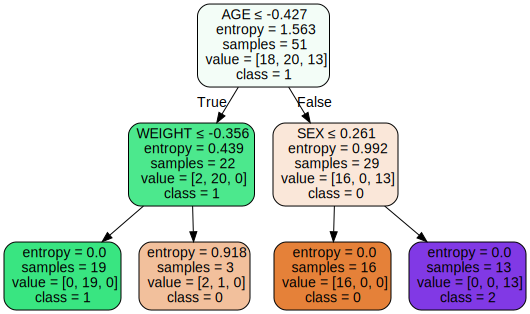

In [22]:
dot_data = export_graphviz(dt, out_file=None, 
                         feature_names=prediction_features,  
                         class_names=["0","1","2"], # needs to be lexicographically sorted
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = graphviz.Source(dot_data)
graph

In [33]:
Z_df_simple["cluster"]

0     1
1     0
2     0
4     2
5     2
6     0
7     0
8     2
9     2
10    0
11    1
12    2
13    0
14    1
15    0
16    0
17    1
18    1
20    2
21    2
22    1
23    1
24    0
25    1
26    0
27    2
28    2
29    0
30    1
31    2
32    2
33    1
34    1
35    0
36    0
37    0
38    2
39    0
40    1
41    1
42    0
43    1
44    2
45    0
46    1
47    1
48    1
49    1
50    1
51    1
53    0
Name: cluster, dtype: int32

# Predict the sex of a bear from other attributes

#### Get only older bears

In [23]:
df_older = df[df["AGE"]>20].copy()

In [24]:
w_a = df_older["WEIGHT"]*1./df_older["AGE"]
df_older["W_A"] = w_a
l_a = df_older["LENGTH"]*1./df_older["AGE"]
df_older["L_A"] = l_a

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix
import graphviz

In [26]:
sex = ["male" if s == 1 else "female" for s in df_older["SEX"] ]

In [27]:
dt = DecisionTreeClassifier(max_depth=2,criterion="entropy")
dt = dt.fit(df_older[["W_A","L_A"]],sex)

In [28]:
sortedLabelList = ["female", "male"]
print(confusion_matrix(y_true=sex, y_pred=dt.predict(df_older[["W_A","L_A"]]), labels=sortedLabelList))

[[13  0]
 [ 0 20]]


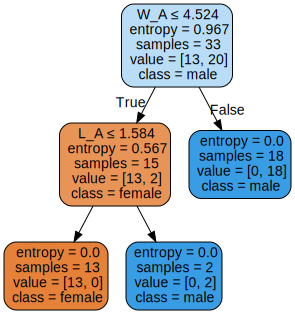

In [29]:
dot_data = export_graphviz(dt, out_file=None, 
                         feature_names=df_older[["W_A","L_A"]].columns,  
                         class_names=sortedLabelList, # needs to be lexicographically sorted
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = graphviz.Source(dot_data)
graph

### Cross-validation

In [30]:
from sklearn.model_selection import StratifiedKFold,cross_validate

In [31]:
scoring = ['accuracy', 'precision_macro', 'precision_weighted', 'recall_macro', 'recall_weighted', 'f1_macro', 'f1_weighted']
cv = StratifiedKFold(n_splits=5, random_state=10, shuffle=True)
scores = cross_validate(dt, df_older[["W_A","L_A"]], sex, scoring=scoring, cv=cv, return_train_score=False)


In [32]:
scores

{'fit_time': array([0.00179601, 0.00119305, 0.00119996, 0.00117397, 0.00121713]),
 'score_time': array([0.00667715, 0.00598502, 0.00633597, 0.00635791, 0.00574803]),
 'test_accuracy': array([0.85714286, 0.85714286, 0.85714286, 1.        , 1.        ]),
 'test_f1_macro': array([0.85714286, 0.85714286, 0.84444444, 1.        , 1.        ]),
 'test_f1_weighted': array([0.85714286, 0.85714286, 0.85079365, 1.        , 1.        ]),
 'test_precision_macro': array([0.875, 0.875, 0.9  , 1.   , 1.   ]),
 'test_precision_weighted': array([0.89285714, 0.89285714, 0.88571429, 1.        , 1.        ]),
 'test_recall_macro': array([0.875     , 0.875     , 0.83333333, 1.        , 1.        ]),
 'test_recall_weighted': array([0.85714286, 0.85714286, 0.85714286, 1.        , 1.        ])}